In [ ]:
#This dataset have the parameters for titanic ship and using these we have to predict if the person survived or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [3]:
train_df=pd.read_csv('titanic/train.csv')

In [4]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df=pd.read_csv("titanic/test.csv")

In [7]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [8]:
train_df.shape

(891, 12)

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Percentage of missing values......in clumn Age
print('%.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

19.87%


[Text(0.5, 0, 'Age')]

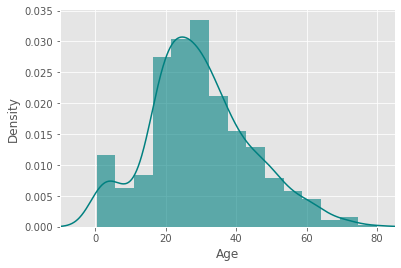

In [11]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True,color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
plt.xlim(-10,85)
ax.set(xlabel='Age')

In [12]:
a=train_df['Age'].median()
a

28.0

In [13]:
print('%.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

77.10%


In [14]:
print('%.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

0.22%


In [15]:
train_df.drop('Cabin',axis=1,inplace=True)

In [16]:
import seaborn as sns


In [17]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
b=train_df['Embarked'].mode()

In [19]:
train_data=train_df.copy()

In [20]:
train_data['Age'].fillna(train_df['Age'].median(), inplace=True)

In [21]:




train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train_data['Embarked'].fillna('b',inplace=True)

In [23]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train_data['TravelWithFamily']=np.where((train_data['SibSp']+train_data['Parch'])>0,1,0)
train_data.drop('SibSp', axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelWithFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [26]:
train_data.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

In [27]:
training=pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'])

In [28]:
training.head()

,Survived,Age,Fare,TravelWithFamily,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_b,Sex_female,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,0,1,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,0,1,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,0,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,1


In [29]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [31]:
test_df.drop('Cabin',axis=1, inplace=True)

In [32]:
test_df['Fare'].fillna(train_df['Fare'].median(),inplace=True)

<AxesSubplot:ylabel='Density'>

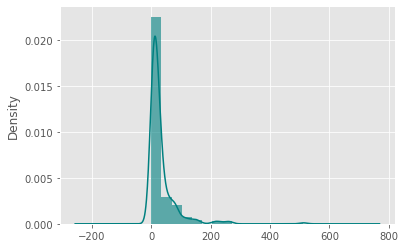

In [33]:
bx = train_data["Fare"].hist(bins=15, density=True, stacked=True,color='teal', alpha=0.6)
train_data["Fare"].plot(kind='density', color='teal')



In [34]:
test_df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [35]:
test=pd.get_dummies(test_df,columns=['Sex','Embarked','Pclass'])

In [36]:
test.drop('Sex_female',axis=1,inplace=True)

In [37]:
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,0,1


In [38]:
training.drop('Sex_female',axis=1,inplace=True)

In [39]:
training.head()

,Survived,Age,Fare,TravelWithFamily,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_b,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,1


In [40]:
training['IsMinor']=np.where(training['Age']<=16,1,0)

In [41]:
test['IsMinor']=np.where(test['Age']<=16,1,0)

In [42]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Age               891 non-null    float64
 2   Fare              891 non-null    float64
 3   TravelWithFamily  891 non-null    int32  
 4   Pclass_1          891 non-null    uint8  
 5   Pclass_2          891 non-null    uint8  
 6   Pclass_3          891 non-null    uint8  
 7   Embarked_C        891 non-null    uint8  
 8   Embarked_Q        891 non-null    uint8  
 9   Embarked_S        891 non-null    uint8  
 10  Embarked_b        891 non-null    uint8  
 11  Sex_male          891 non-null    uint8  
 12  IsMinor           891 non-null    int32  
dtypes: float64(2), int32(2), int64(1), uint8(8)
memory usage: 34.9 KB


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.feature_selection import RFE

In [45]:
col = ["Age","Fare","TravelWithFamily","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]

In [46]:
x=training[col]
y=training['Survived']

In [47]:
model=LogisticRegression(max_iter=1000)

In [48]:
rfe=RFE(model,8)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [49]:
rfe=rfe.fit(x,y)

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

logres=LogisticRegression(max_iter=1000)
logres.fit(x_train,y_train)

y_pred=logres.predict(x_test)
y_pred_prob=logres.predict_proba(x_test)[:,1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)

print(logres.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logres.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_prob))
print(logres.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.838


In [51]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [52]:
compdata=list(zip(y_test,y_pred))

In [53]:
compdata

[(1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 

In [54]:
compdata=pd.DataFrame(compdata,columns=['Actual','Predicted'])

In [55]:
compdata

,Actual,Predicted
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
174,0,0
175,0,0
176,0,0
177,0,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


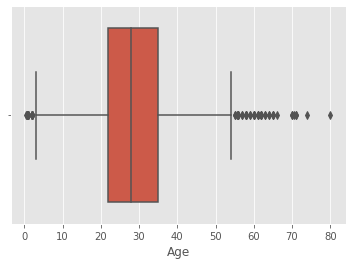

In [56]:
box2=sns.boxplot(train_data['Age'])

In [57]:
col1 = ["Age","TravelWithFamily","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]

In [58]:
x2=training[col]
y2=training['Survived']

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.2,random_state=2)
logres2=LogisticRegression(max_iter=1000)
logres2.fit(xtrain,ytrain)

ypred=logres2.predict(xtest)
ypred_prob=logres2.predict_proba(xtest)[:,1]

[fpr, tpr, thr] = roc_curve(ytest, ypred_prob)

print(logres2.__class__.__name__+" accuracy is %2.3f" % accuracy_score(ytest, ypred))

LogisticRegression accuracy is 0.782


In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.83      0.63      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[90 10]
 [29 50]]
